# Calculating GB energy from DF

## Objective

(i) Select data from boundaries
(ii) Organize it for all grains
(iii) Calculate the energy with wield

## Method

    * Open Dataframe
    * Select attributes of interest from boundaries
    * Create a new DF with grain information
    * Convert data to wield
    * Run wield for all grains
    * Store energy in Dataframe

In [147]:
import pandas as pd
import numpy as np
from skimage import draw
from skimage.segmentation import flood, flood_fill

from matplotlib import pyplot as plt


### Open Dataframe


In [2]:

folder = "../data/"
file = "1_005"
path = folder + file

#%%

sample = np.loadtxt(path+ ".txt")

'''
# Column 1-3:   right hand average orientation (phi1, PHI, phi2 in radians)
# Column 4-6:   left hand average orientation (phi1, PHI, phi2 in radians)
# Column 7:     Misorientation Angle
# Column 8-10:  Misorientation Axis in Right Hand grain
# Column 11-13: Misorientation Axis in Left Hand grain
# Column 14:    length (in microns)
# Column 15:    trace angle (in degrees)
# Column 16-19: x,y coordinates of endpoints (in microns)
# Column 20-21: IDs of right hand and left hand grains

'''


df = pd.DataFrame(  data = sample, 
                    columns = ["right_phi1","right_PHI","right_phi2",                 #1-3
                               "left_phi1","left_PHI","left_phi2",                    #4-6 
                               "ori_angle",                                           #7
                               "right_ori_x","right_ori_y","right_ori_z",              #8-10
                               "left_ori_x","left_ori_y","left_ori_z",                 #11-13  
                               "length",                                              #14
                               "trace_angle",                                         #15
                               "x_start", "y_start", "x_end", "y_end",                #16-19
                               "grain_right","grain_left"                             #20-21
                               ]                    
                 )


In [3]:
df.grain_right.drop_duplicates(keep = False)

10      1120.0
25      2455.0
35      3207.0
39      3372.0
44      3595.0
         ...  
7311    1901.0
7324    2874.0
7328    2486.0
7330    3008.0
7340     130.0
Name: grain_right, Length: 420, dtype: float64

### Select attributes of interest from boundaries

The group of information that is directly related to the grain: 
* Column 1-3:   right hand average orientation (phi1, PHI, phi2 in radians)
* Column 4-6:   left hand average orientation (phi1, PHI, phi2 in radians)
* Column 7:     Misorientation Angle
* Column 8-10:  Misorientation Axis in Right Hand grain
* Column 11-13: Misorientation Axis in Left Hand grain
* Column 20-21: IDs of right hand and left hand grains

The Columns 20-21 describe the grain of interest

The Columns 1-6 depends on grain itself, **here we are interested**

The Columns 7-13 depends on left and right grains

In [4]:
#df_left = df[['ori_angle','left_phi1','left_PHI','left_phi2','left_ori_x','left_ori_y','left_ori_z','grain_left']]
#df_right = df[['right_phi1','right_PHI','right_phi2','right_ori_x','right_ori_y','right_ori_z','grain_right']]

# left_ori is related with other grain, than is not interesting to keep in this case

df_left = df[['left_phi1','left_PHI','left_phi2','grain_left']]
df_left = df_left.rename(columns={"grain_left": "grain"})


df_right = df[['right_phi1','right_PHI','right_phi2','grain_right']]
df_right = df_right.rename(columns={"grain_right": "grain"})


In [ ]:
df_left = df_left[~df_left.grain.duplicated()].sort_values('grain')
df_left = df_left.set_index('grain')


In [ ]:
df_right = df_right[~df_right.grain.duplicated()].sort_values('grain')
df_right = df_right.set_index('grain')


In [ ]:
#df_grains = pd.concat([df_left,df_right])
df_grains = df_left.join(df_right)

In [ ]:
df_grains.sort_values('grain')

In [ ]:
df_grains.left_phi1.equals(df_grains.right_phi1)

## Fill Grains based on phi1, PHI, and phi2

In [76]:
grain = 100
One_grain = df[(df["grain_right"] == grain) | (df["grain_left"] == grain)]
One_grain

,right_phi1,right_PHI,right_phi2,left_phi1,left_PHI,left_phi2,ori_angle,right_ori_x,right_ori_y,right_ori_z,...,left_ori_y,left_ori_z,length,trace_angle,x_start,y_start,x_end,y_end,grain_right,grain_left
408,1.917,0.639,5.135,6.271,0.745,0.120,51.29,-21.0,-18.0,-5.0,...,-18.0,-5.0,17.243,129.6,29.0,47.92,40.0,61.20,119.0,100.0
409,6.271,0.745,0.120,0.858,0.219,5.426,36.96,18.0,-6.0,5.0,...,-6.0,5.0,13.614,42.7,29.0,47.92,39.0,38.68,100.0,79.0
458,3.569,0.749,2.910,6.271,0.745,0.120,12.89,14.0,-22.0,9.0,...,-22.0,9.0,16.042,4.1,39.0,38.68,55.0,37.53,2.0,100.0
462,6.271,0.745,0.120,3.202,0.343,3.108,28.15,-17.0,0.0,3.0,...,0.0,3.0,27.301,171.5,40.0,61.20,67.0,65.24,100.0,133.0
463,6.271,0.745,0.120,3.202,0.343,3.108,28.15,-17.0,0.0,3.0,...,0.0,3.0,9.165,70.9,67.0,65.24,70.0,56.58,100.0,133.0
532,6.271,0.745,0.120,2.559,0.670,3.099,40.34,-3.0,12.0,13.0,...,12.0,13.0,11.136,128.9,55.0,37.53,62.0,46.19,100.0,80.0
566,6.271,0.745,0.120,0.695,0.562,6.276,36.48,7.0,-20.0,-20.0,...,-20.0,-20.0,13.115,127.6,62.0,46.19,70.0,56.58,100.0,103.0


In [155]:

width = int(max([max(One_grain.x_end),max(One_grain.x_start)]))+1
height = int(max([max(One_grain.y_end),max(One_grain.y_start)]))+1

width,height

(71, 66)

In [170]:
np_img.shape

(66, 71, 1)

In [231]:
One_grain[['x_start','x_end']].mean().mean(),One_grain[['y_start','y_end']].mean().mean()

(51.71428571428571, 50.47714285714285)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


29 47 40 61

29 47 39 38

39 38 55 37

40 61 67 65

67 65 70 56

55 37 62 46

62 46 70 56



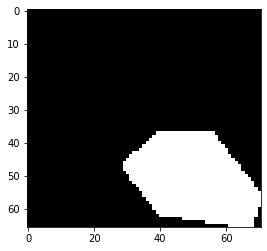

In [229]:

np_img = np.zeros([height, width, 3])

for idx, row in One_grain.iterrows():
    print("%d %d %d %d\n" %(row.x_start.astype("uint16"),row.y_start.astype("uint16"),row.x_end.astype("uint16"),row.y_end.astype("uint16")))
    #rr,cc = draw.polygon(One_grain.x_start, One_grain.y_start, np_img.shape)
    rr,cc,a = draw.line(row.x_start.astype("uint16"),row.y_start.astype("uint16"),row.x_end.astype("uint16"),row.y_end.astype("uint16"))
    np_img[cc,rr,:3] = (1,255,1)
    
np_img = flood_fill(np_img, (50, 52,1), 255 )
#np_img = flood_fill(np_img, (50, 52,0), 155 )
plt.imshow(np_img)



In [130]:
One_grain.y_start.iloc[1:3]

409    47.92
458    38.68
Name: y_start, dtype: float64

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


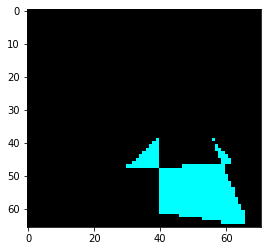

In [142]:

np_img = np.zeros([height, width, 3])


rr,cc = draw.polygon(One_grain.x_start, One_grain.y_start, np_img.shape)
np_img[cc,rr,:] = (0,255,255)
#rr,cc = draw.polygon_perimeter(One_grain.x_start.iloc[3:8], One_grain.y_start.iloc[3:8], np_img.shape)
#np_img[cc,rr,:] = (0,255,255)

    
plt.imshow(np_img)

In [120]:
a = One_grain[['x_start','y_start','x_end','y_end']].to_numpy()

a

array([[29.  , 47.92, 40.  , 61.2 ],
       [29.  , 47.92, 39.  , 38.68],
       [39.  , 38.68, 55.  , 37.53],
       [40.  , 61.2 , 67.  , 65.24],
       [67.  , 65.24, 70.  , 56.58],
       [55.  , 37.53, 62.  , 46.19],
       [62.  , 46.19, 70.  , 56.58]])

The method polygon_fill do not work because it uses the Even–odd rule and fill all closed paths based on directions provided as parameters. As the order or parameters meters and in our case is not ordered, this method is not helpful.


## Flood Fill method

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


29 47 40 61

29 47 39 38

39 38 55 37

40 61 67 65

67 65 70 56

55 37 62 46

62 46 70 56



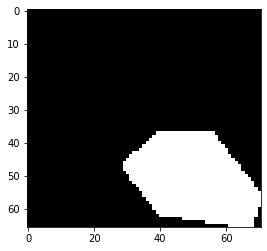

In [232]:

np_img = np.zeros([height, width, 3])

for idx, row in One_grain.iterrows():
    print("%d %d %d %d\n" %(row.x_start.astype("uint16"),row.y_start.astype("uint16"),row.x_end.astype("uint16"),row.y_end.astype("uint16")))
    #rr,cc = draw.polygon(One_grain.x_start, One_grain.y_start, np_img.shape)
    rr,cc,a = draw.line_aa(row.x_start.astype("uint16"),row.y_start.astype("uint16"),row.x_end.astype("uint16"),row.y_end.astype("uint16"))
    np_img[cc,rr,:3] = (1,255,1)
    
np_img = flood_fill(np_img, (50, 52,1), 255 )
#np_img = flood_fill(np_img, (50, 52,0), 155 )
plt.imshow(np_img)



The method floodfill worked but only to binary images. As we need to fill with 3 channels, phi1, PHI, phi2, we need to use the method from another librarby or implement by hand.